<a href="https://colab.research.google.com/github/Angshumita2000/Summer-Analytics-assingments-2023/blob/main/Copy_of_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 SA

Hey Everyone!!
We hope that you are excited to apply your newly acquired knowledge and test it on this notebook.
In this assignment, we will be walking through creating an email classifier based the content the mail has.

## About the data

The data "email.csv" has a few rows and about 3K columns including <b>Email_no.</b> and <b>spam</b>. <br>
Email_no. is like a unique id for an email and spam denotes whether the given mail is a spam or not (0 = not spam, 1 = spam)<br>
Rest of the columns are words in english with the values being equal to the frequency of that word in the email.
<br>Our goal is to predict whether the given mail is spam or not

## Importing useful libraries

In [ ]:
import pandas as pd
import numpy as np

## Loading the data
### If you are using Datalore, you may use the csv file directly. Otherwise you may download it from <a href = "https://drive.google.com/file/d/1OxJ6SSuPypg-AfLbMRl0O9So9aDDNzbC/view?usp=sharing">this link</a>

In [ ]:
df = pd.read_csv('/content/emails.csv')

## Describe the data and generate some basic insights unsing methods like .info

In [ ]:
df.head()
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

## Looking at the data

Text(0.5, 1.0, 'Most frequent Spam word')

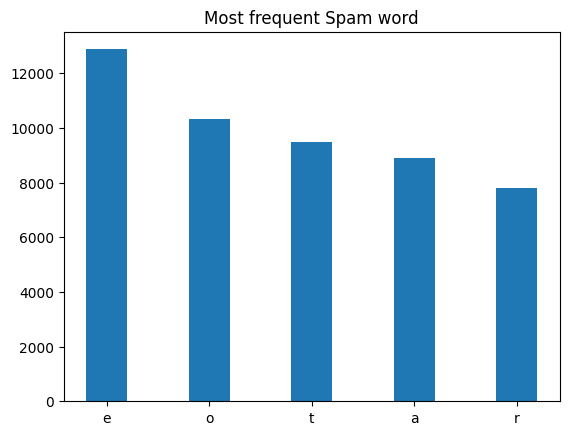

In [ ]:
# Plot histogram to visualize the top 5 common words in spam mail and non-spam mails seperately.
from matplotlib import pyplot as plt
import numpy as np
spam_email=df[df["spam"]==1]
non_spam_email=df[df["spam"]==0]
spam_word_freq=spam_email.drop(['Email No.','spam'],axis=1).sum().sort_values(ascending=False)[0:5]
non_spam_word_freq=non_spam_email.drop(['Email No.','spam'],axis=1).sum().sort_values(ascending=False)[0:5]

X=list(spam_word_freq.keys())
freq1=[12873,10324,9473,8896,7818]
plt.bar(X,freq1,width = 0.4)
plt.title('Most frequent Spam word')


Text(0.5, 1.0, 'Most frequent Non- Spam word')

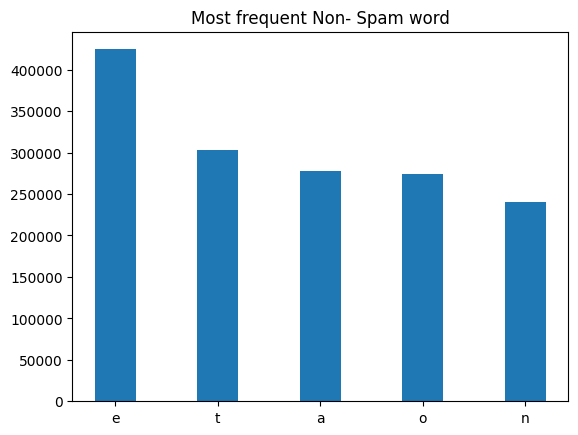

In [ ]:
y=list(non_spam_word_freq.keys())
freq2=[424653,302547,277415,273874,240696]
plt.bar(y,freq2,width = 0.4)
plt.title('Most frequent Non- Spam word')


## Figuring out some comparatively more important features

In [ ]:
# There are 3K rows given in this dataset, can you think of some method to reduce the number of columns in the dataset?
# Try taking only top 1.5K that will comprise of some of the most "deciding factors"
 # to have significant covariates we can use forward selection method to find which covariates are significant
cols = sorted(list(df.columns[1:-1]),key=lambda col:(df[col].sum() ),reverse=True)[1498:]
df_new = df.drop(cols,axis=1)
df_new.head(),df_new.shape





(  Email No.  the  to  ect  and  for  of    a  you  hou  ...  tue  fire  tm  \
 0   Email 1    0   0    1    0    0   0    2    0    0  ...    0     0   1   
 1   Email 2    8  13   24    6    6   2  102    1   27  ...    0     0   0   
 2   Email 3    0   0    1    0    0   0    8    0    0  ...    0     0   0   
 3   Email 4    0   5   22    0    5   1   51    2   10  ...    0     0   0   
 4   Email 5    7   6   17    1    5   2   57    0    9  ...    0     0   0   
 
    del  trial  ended  plain  lay  ff  Prediction  
 0    0      0      0      0    0   0           0  
 1    0      0      0      0    0   1           0  
 2    0      0      0      0    0   0           0  
 3    0      0      0      0    0   0           0  
 4    0      0      0      0    0   1           0  
 
 [5 rows x 1500 columns],
 (5172, 1500))

## Train - Test Split

In [ ]:
# Create trianing and testing data
from sklearn.model_selection import train_test_split
X = df_new.drop(["Prediction","Email No."], axis=1)
Y = df_new["Prediction"]
X_train, X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.2,random_state=42)


## Making Predictions using Multinomial NB Classifier

In [ ]:
# Feed the train data into multinomial naive bias classifier
from sklearn.naive_bayes import MultinomialNB
naive_bayes= MultinomialNB()
naive_bayes.fit(X_train, Y_train)
#make prediction on test data
y_pred= naive_bayes.predict(X_test)


In [ ]:
# Check the model's accuracy of test data and plot the ROC-AUC curve
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Evaluating accuracy on the test-data
y_pred_proba= naive_bayes.predict_proba(X_test)[:,1]
y_pred= (y_pred_proba > 0.5).astype(int)
accuracy = accuracy_score(Y_test,y_pred)
accuracy

0.9449275362318841

Text(0.5, 1.0, 'ROC curve')

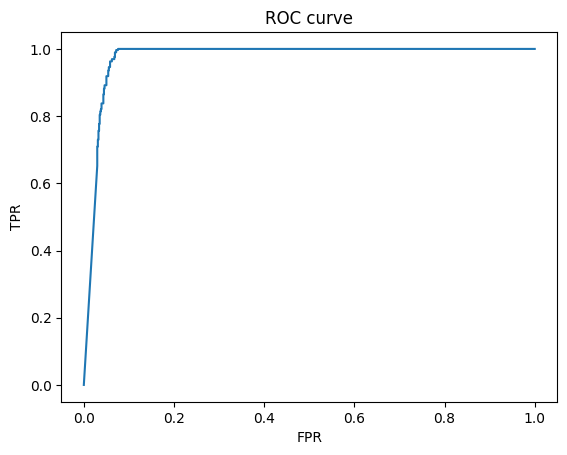

In [ ]:
#Roc Curve
fpr,tpr,tresholds = roc_curve(Y_test,y_pred_proba)
roc_auc= roc_auc_score(Y_test,y_pred_proba)
plt.figure()
plt.plot(fpr,tpr, label="ROC curve"%roc_auc)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC curve')


## Plot the confusion Matrix

In [ ]:
# Print Confusion Matrix using any 5 words of your choice with the column 'spam'
from sklearn.metrics import confusion_matrix
confusion_matrix1=confusion_matrix(Y_test,y_pred)
print(confusion_matrix1)

[[696  43]
 [ 14 282]]


## Trying out with SVMs

In [ ]:
# Try using Support Vector Classifier (SVC) from scikit-learn
# Apply similar processes as above through SVC i.e., Make prediction, check accuacy and plot confusion matrix
from sklearn import svm
from sklearn import metrics

model2= svm.SVC()
model2.fit(X_train,Y_train)
y_predict=model2.predict(X_test)
metrics.accuracy_score(Y_test,y_predict)


0.8173913043478261

In [ ]:
confusion_matrix2=confusion_matrix(Y_test,y_predict)
print(confusion_matrix2)

[[727  12]
 [177 119]]


## Comparing the models

In [ ]:
# Which model performed better?
# Can you suggest some reason for better performance of one model over the other?
metrics.accuracy_score(Y_test,y_predict)
accuracy
#obviously Multinomial  NB Classifier performed well.


0.9449275362318841

Multinomial  NB Classifier performed well. Well this is two dimensional binary data. Multinomial assumes all features are independent
Svm finds correlations between features.


## Bonus Question

In [ ]:
# Given a string. Try to create the dataset having each word of dataset as column and row values as the frequency of that word.
# For example
from collections import defaultdict
s = "I am a Python developer and currently working on a project to classify mails"
# dataframe = {"I" : 1,
#              "am" :1,
#              "a" : 2,
#               ...}
l= s.split()
# count the frequency of eachword
word_counts= defaultdict(int)
for i in l:
  word_counts[i]+=1

#creteing a dataframe with word freq
dataframe= pd.DataFrame.from_dict(word_counts,orient="index",columns=['Freq'])

dataframe

,Freq
I,1
am,1
a,2
Python,1
developer,1
and,1
currently,1
working,1
on,1
project,1
